In [1]:
from mean_nuc_mesh_from_data import *
import pandas

In [2]:
df = pd.read_csv('mesh_vtk_files/nucleus_timelapse.csv', index_col=0)

In [ ]:
verts, faces = get_mean_mesh_from_individual_meshes(df)

In [ ]:
np.save(verts, 'test')

In [2]:
mask = np.load('mean_nuc_mask.npy')

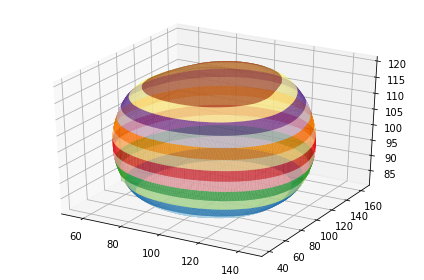

In [3]:
plot_nuc_mask(mask)